In [19]:
import os, glob, yaml
from collections import ChainMap
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


def get_metric_files(logs_root):
    version_roots = glob.glob(os.path.join(logs_root, '*'))
    version_data = []
    for version_root in version_roots:
        metric_file = os.path.join(version_root, 'metrics.csv')
        metadata_file = os.path.join(version_root, 'metadata.yaml')
        # checkpoint_file = os.path.join(version_root, glob.glob(os.path.join(version_root, 'checkpoints', '*'))[0])
        checkpoint_file = None
        if os.path.exists(metric_file):
            version_data.append((metric_file, metadata_file,  checkpoint_file))
    return version_data

def get_metadata(metadata_file):
    if os.path.exists(metadata_file):
        with open(metadata_file, 'r') as f:
            raw = yaml.safe_load(f)
            metadata = dict(ChainMap(*raw.get('model', [])))
            for key in ('time', 'benchmark'):
                if key in metadata and isinstance(metadata[key], list):
                    metadata[key] = dict(ChainMap(*metadata[key]))
        return metadata
    else:
        return None

def get_metrics(metrics_file):
    if os.path.exists(metrics_file):
        return pd.read_csv(metrics_file)
    else:
        return None

In [2]:
chapter_dir = "images\chapter02"

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\fhcar\AppData\Local\Temp\ipykernel_28208\1336946892.py:1: SyntaxWarning: invalid escape sequence '\c'
  chapter_dir = "images\chapter02"


# Stage 1
Wybór architektury segmentacyjnej.

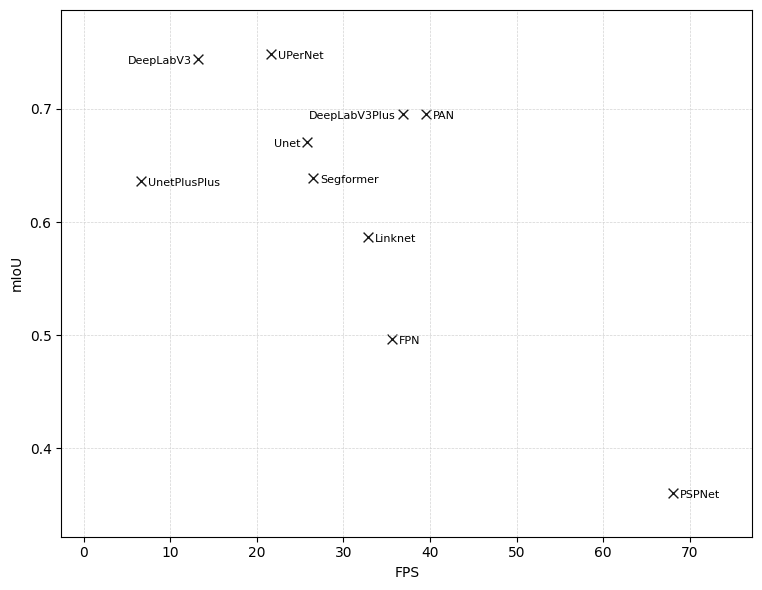

In [3]:
x_vals = []
y_vals = []
labels = []

root_dir = '.\\checkpoints\\modern\\stage1'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        if metadata is None:
            continue

        if metadata['name'] == 'MAnet':
            continue
        
        if 'val_miou_dataset' not in metrics.columns:
            continue
        miou = metrics['val_miou_dataset'].tail(5).mean()
        
        fps = metadata.get('benchmark', {}).get('fps', None)
        if fps is None:
            continue
        
        name = metadata.get('name', os.path.basename(arch_dir))
        
        x_vals.append(fps)
        y_vals.append(miou)
        labels.append(name)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_vals, y_vals, s=50, marker='x',
               color='black', linewidth=1, alpha=0.9)

for x, y, lbl in zip(x_vals, y_vals, labels):
    # różne offsety zależnie od etykiety
    if lbl == 'Unet':
        offset = (-5, -5)   # w lewo i w górę
        ha = 'right'
    elif lbl == 'DeepLabV3Plus':
        offset = (-5, -5)   # w lewo i w górę
        ha = 'right'
    elif lbl == 'DeepLabV3':
        offset = (-5, -5)   # w lewo i w górę
        ha = 'right'
    else:
        offset = (5, -5)    # domyślne dla pozostałych
        ha = 'left'

    ax.annotate(
        lbl,               # tekst
        (x, y),            # punkt, do którego strzałka wskazuje
        xytext=offset,     # przesunięcie tekstu w punktach
        textcoords='offset points',
        fontsize=8,
        ha=ha,             # wyrównanie poziome tekstu
        va='bottom',
    )

ax.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')

ax.set_xlabel('FPS')
ax.set_ylabel('mIoU')
plt.tight_layout()
plt.margins(0.15, 0.1)
plt.savefig(f'{chapter_dir}\\exp_stage1.png', dpi=150, bbox_inches='tight')

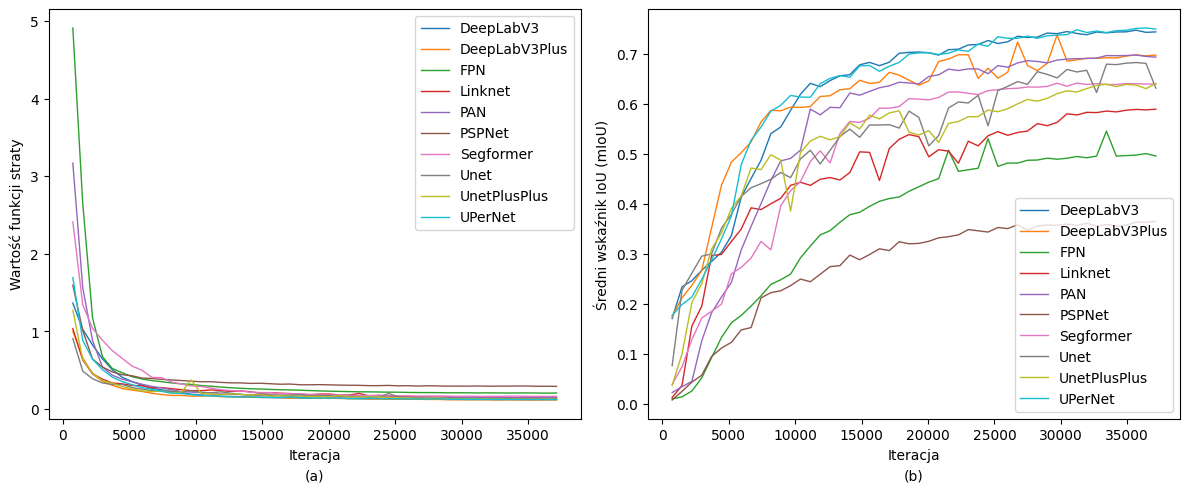

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Iteracja po architekturach i plikach metryk
for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        name = metadata.get('name', os.path.basename(arch_dir))

        if name == 'MAnet':
            continue

        # Rysowanie krzywych
        ax1.plot(metrics['step'], metrics['val_loss'], label=name, linewidth=1)
        ax2.plot(metrics['step'], metrics['val_miou_dataset'], label=name, linewidth=1)

# Konfiguracja wykresu strat (a)
ax1.set_xlabel('Iteracja')
ax1.set_ylabel('Wartość funkcji straty')
ax1.legend()
# Podpis (a) na dole
ax1.text(0.5, -0.15, '(a)', transform=ax1.transAxes, ha='center')

# Konfiguracja wykresu mIoU (b)
ax2.set_xlabel('Iteracja')
ax2.set_ylabel('Średni wskaźnik IoU (mIoU)')
ax2.legend()
# Podpis (b) na dole
ax2.text(0.5, -0.15, '(b)', transform=ax2.transAxes, ha='center')

fig.tight_layout()
plt.savefig(f'{chapter_dir}\\exp_stage1_2.png', dpi=150, bbox_inches='tight')

## Stage 2

Wybór enkodera konwolucyjnego

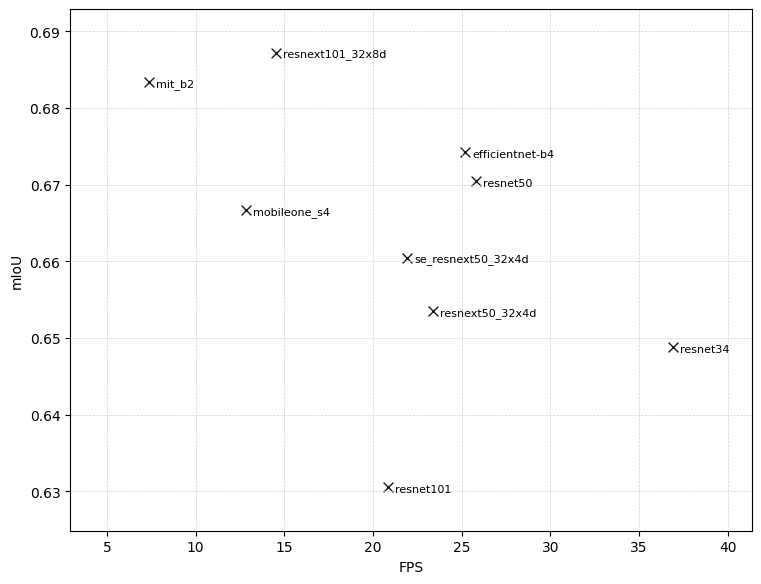

In [5]:
import matplotlib.pyplot as plt

x_vals = []
y_vals = []
labels = []

root_dir = '.\\checkpoints\\modern\\stage2'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        if metadata is None:
            continue
        
        if 'val_miou_dataset' not in metrics.columns:
            continue
        miou = metrics['val_miou_dataset'].tail(5).mean()
        
        fps = metadata.get('benchmark', {}).get('fps', None)
        if fps is None:
            continue
        
        name = metadata.get('encoder', os.path.basename(arch_dir))
        
        x_vals.append(fps)
        y_vals.append(miou)
        labels.append(name)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_vals, y_vals, s=50, marker='x',
               color='black', linewidth=1, alpha=0.9)

for x, y, lbl in zip(x_vals, y_vals, labels):
    offset = (5, -5)    # domyślne dla pozostałych
    ha = 'left'

    ax.annotate(
        lbl,               # tekst
        (x, y),            # punkt, do którego strzałka wskazuje
        xytext=offset,     # przesunięcie tekstu w punktach
        textcoords='offset points',
        fontsize=8,
        ha=ha,             # wyrównanie poziome tekstu
        va='bottom',
    )

ax.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')

ax.set_xlabel('FPS')
ax.set_ylabel('mIoU')
plt.tight_layout()
plt.margins(0.15, 0.1)
plt.savefig(f'{chapter_dir}\\exp_stage2.png', dpi=150, bbox_inches='tight')

## Stage 3

Wybór konfiguracji funkcji straty

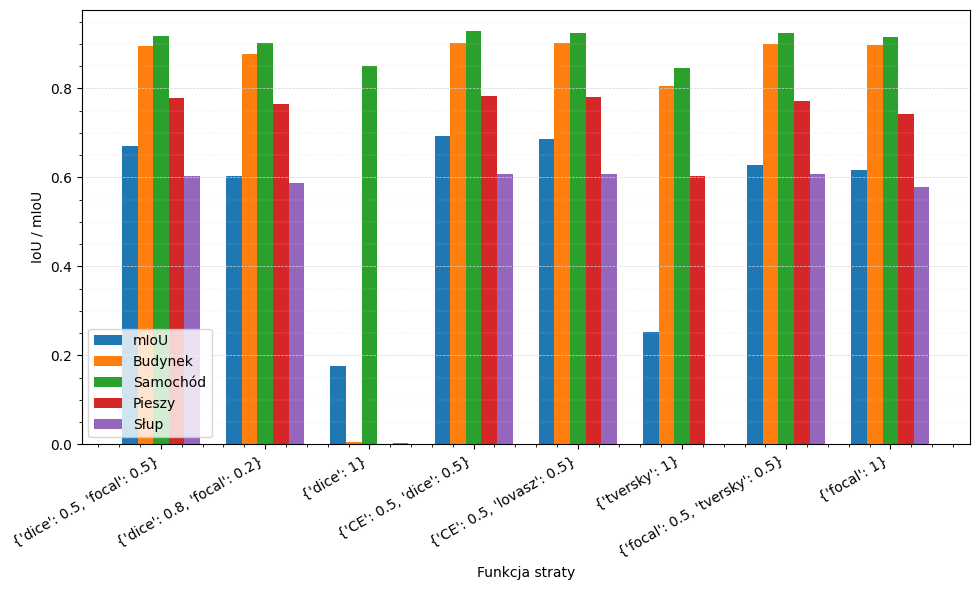

In [24]:
loss_names       = []
miou_vals        = []
building_iou     = []
car_iou          = []
pedestrian_iou   = []
pole_iou         = []

root_dir = '.\\checkpoints\\modern\\stage3'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics  = get_metrics(file[0])
        metadata = get_metadata(file[1])
        if metadata is None or 'val_miou_dataset' not in metrics.columns:
            continue

        # średnie z ostatnich 5 epok
        miou = metrics['val_miou_dataset'  ].tail(5).mean()
        bldg = metrics['iou_building'  ].tail(5).mean()
        car  = metrics['iou_car'].tail(5).mean()
        ped  = metrics['iou_person'].tail(5).mean()
        pole = metrics['iou_pole'      ].tail(5).mean()

        loss_fn = metadata.get('loss_fn', os.path.basename(arch_dir))

        loss_names     .append(loss_fn)
        miou_vals      .append(miou)
        building_iou   .append(bldg)
        car_iou        .append(car)
        pedestrian_iou .append(ped)
        pole_iou       .append(pole)

# --- rysowanie wykresu słupkowego ---
n  = len(loss_names)
ind = np.arange(n)
w  = 0.15  # szerokość jednego słupka

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(ind - 2*w, miou_vals,        w, label='mIoU')
ax.bar(ind -   w, building_iou,     w, label='Budynek')
ax.bar(ind,       car_iou,          w, label='Samochód')
ax.bar(ind +   w, pedestrian_iou,   w, label='Pieszy')
ax.bar(ind + 2*w, pole_iou,         w, label='Słup')

ax.set_xlabel('Funkcja straty')
ax.set_ylabel('IoU / mIoU')
ax.set_xticks(ind)
ax.set_xticklabels(loss_names, rotation=30, ha='right')

# siatka główna i pomocnicza na osi Y
ax.yaxis.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')
ax.minorticks_on()
ax.yaxis.grid(which='minor', linestyle=':', linewidth=0.3, color='lightgray')

ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig(f'{chapter_dir}\\exp_stage3.png', dpi=150, bbox_inches='tight')

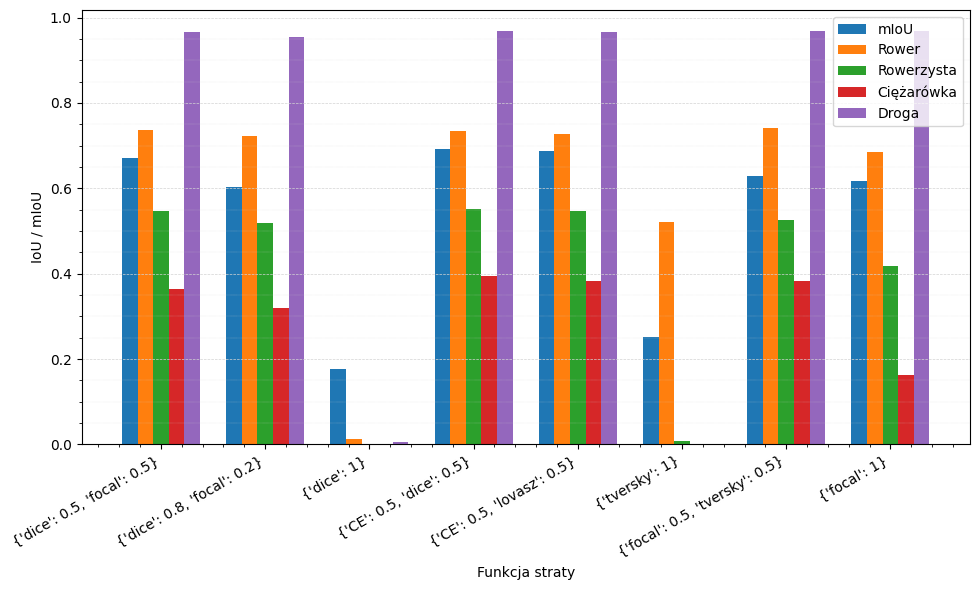

In [25]:
loss_names       = []
miou_vals        = []
building_iou     = []
car_iou          = []
pedestrian_iou   = []
pole_iou         = []

root_dir = '.\\checkpoints\\modern\\stage3'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics  = get_metrics(file[0])
        metadata = get_metadata(file[1])
        if metadata is None or 'val_miou_dataset' not in metrics.columns:
            continue

        # średnie z ostatnich 5 epok
        miou = metrics['val_miou_dataset'  ].tail(5).mean()
        bldg = metrics['iou_bicycle'  ].tail(5).mean()
        car  = metrics['iou_rider'].tail(5).mean()
        ped  = metrics['iou_truck'].tail(5).mean()
        pole = metrics['iou_road'      ].tail(5).mean()

        loss_fn = metadata.get('loss_fn', os.path.basename(arch_dir))

        loss_names     .append(loss_fn)
        miou_vals      .append(miou)
        building_iou   .append(bldg)
        car_iou        .append(car)
        pedestrian_iou .append(ped)
        pole_iou       .append(pole)

# --- rysowanie wykresu słupkowego ---
n  = len(loss_names)
ind = np.arange(n)
w  = 0.15  # szerokość jednego słupka

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(ind - 2*w, miou_vals,        w, label='mIoU')
ax.bar(ind -   w, building_iou,     w, label='Rower')
ax.bar(ind,       car_iou,          w, label='Rowerzysta')
ax.bar(ind +   w, pedestrian_iou,   w, label='Ciężarówka')
ax.bar(ind + 2*w, pole_iou,         w, label='Droga')

ax.set_xlabel('Funkcja straty')
ax.set_ylabel('IoU / mIoU')
ax.set_xticks(ind)
ax.set_xticklabels(loss_names, rotation=30, ha='right')

# siatka główna i pomocnicza na osi Y
ax.yaxis.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')
ax.minorticks_on()
ax.yaxis.grid(which='minor', linestyle=':', linewidth=0.3, color='lightgray')

ax.legend()
plt.tight_layout()
plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
C:\Users\fhcar\AppData\Local\Temp\ipykernel_28208\2748349453.py:28: SyntaxWarning: invalid escape sequence '\c'
  plt.savefig(f'images\chapter03\lr_plot.png', dpi=150, bbox_inches='tight')


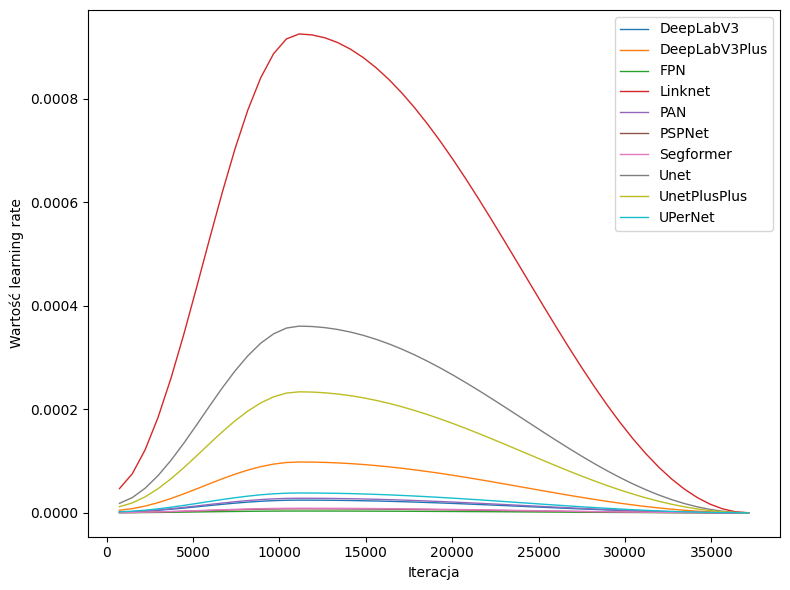

In [8]:
root_dir  = '.\\checkpoints\\modern\\stage1'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))

# Iteracja po architekturach i plikach metryk
for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        name = metadata.get('name', os.path.basename(arch_dir))

        if name == 'MAnet':
            continue

        # Rysowanie krzywych
        ax1.plot(metrics['step'], metrics['lr'], label=name, linewidth=1)

# Konfiguracja wykresu strat (a)
ax1.set_xlabel('Iteracja')
ax1.set_ylabel('Wartość learning rate')
ax1.legend()
# Podpis (a) na dole

fig.tight_layout()
plt.savefig(f'images\chapter03\lr_plot.png', dpi=150, bbox_inches='tight')

# Główny eksperyment

In [9]:
from adjustText import adjust_text

approach_name = 't2'
chapter_dir = "images\chapter03"

root_dir = f'.\\checkpoints\\modern\\stage_{approach_name}'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

def pareto_front_indices(xs, ys, eps=1e-12):
    """
    Zwraca indeksy punktów na froncie Pareto (maksymalizujemy xs=FPS i ys=mIoU).
    Kolejność wynikowa: malejąco po FPS (gotowa do rysowania linią).
    """
    idx = list(range(len(xs)))
    # sortujemy po FPS malejąco, przy remisie po mIoU malejąco (ładniejsze łączenie)
    idx.sort(key=lambda i: (-xs[i], -ys[i]))
    front = []
    best_y = float('-inf')
    for i in idx:
        y = ys[i]
        if y >= best_y - eps:
            front.append(i)
            best_y = y
    return front

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\fhcar\AppData\Local\Temp\ipykernel_28208\4072157675.py:4: SyntaxWarning: invalid escape sequence '\c'
  chapter_dir = "images\chapter03"


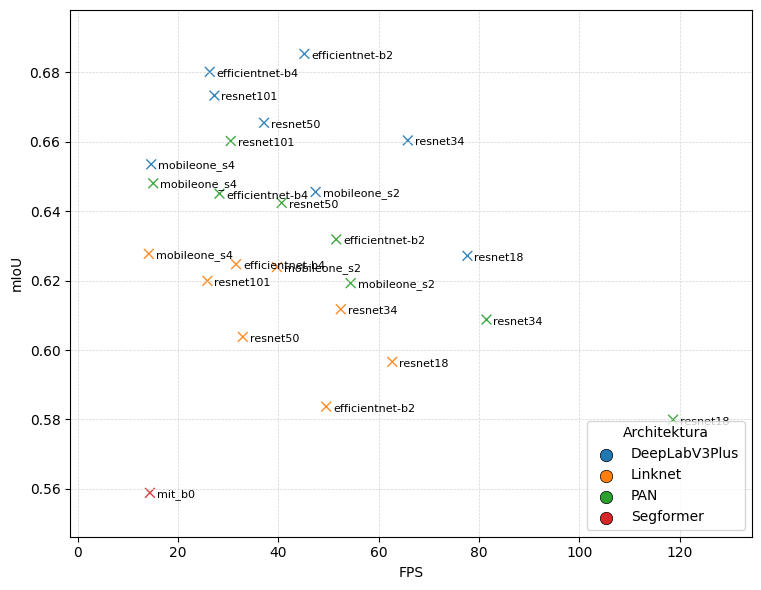

In [10]:
x_vals = []
y_vals = []
labels = []
architectures = []

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        if metadata is None:
            continue
        
        if 'val_miou_dataset' not in metrics.columns:
            continue
        miou = metrics['val_miou_dataset'].tail(5).mean()
        
        fps = metadata.get('benchmark', {}).get('fps', None)
        if fps is None:
            continue
        
        name = metadata.get('encoder', 'unknown')
        arch = metadata.get('name', 'os.path.basename(arch_dir)')
        
        x_vals.append(fps)
        y_vals.append(miou)
        labels.append(name)
        architectures.append(arch)

unique_archs = sorted(set(architectures))
cmap         = plt.get_cmap('tab10')  # paleta 10 kolorów
color_map    = {arch: cmap(i) for i, arch in enumerate(unique_archs)}
colors       = [color_map[arch] for arch in architectures]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_vals, y_vals, c=colors, s=50, marker='x',
                linewidth=1, alpha=0.9)

for x, y, lbl in zip(x_vals, y_vals, labels):

    # if lbl == 'efficientnet-b4':
    #     offset = (-5, -5)   # w lewo i w górę
    #     ha = 'right'
    # elif lbl == 'efficientnet-b2':
    #     offset = (-5, -5)   # w lewo i w górę
    #     ha = 'right'
    # else:
    offset = (5, -5)    # domyślne dla pozostałych
    ha = 'left'

    ax.annotate(
        lbl,               # tekst
        (x, y),            # punkt, do którego strzałka wskazuje
        xytext=offset,     # przesunięcie tekstu w punktach
        textcoords='offset points',
        fontsize=8,
        ha=ha,             # wyrównanie poziome tekstu
        va='bottom',
    )

ax.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')

for arch, col in color_map.items():
    ax.scatter([], [], c=[col], s=80, edgecolor='k', linewidth=0.5, label=arch)
ax.legend(title='Architektura', loc='lower right')

ax.set_xlabel('FPS')
ax.set_ylabel('mIoU')
plt.tight_layout()
plt.margins(0.15, 0.1)
plt.show()

<string>:196: SyntaxWarning: invalid escape sequence '\{'
<>:196: SyntaxWarning: invalid escape sequence '\{'
<string>:196: SyntaxWarning: invalid escape sequence '\{'
<>:196: SyntaxWarning: invalid escape sequence '\{'
C:\Users\fhcar\AppData\Local\Temp\ipykernel_28208\768472954.py:196: SyntaxWarning: invalid escape sequence '\{'
  plt.savefig(f'{chapter_dir}\{approach_name}_learning1.png', dpi=150, bbox_inches='tight')


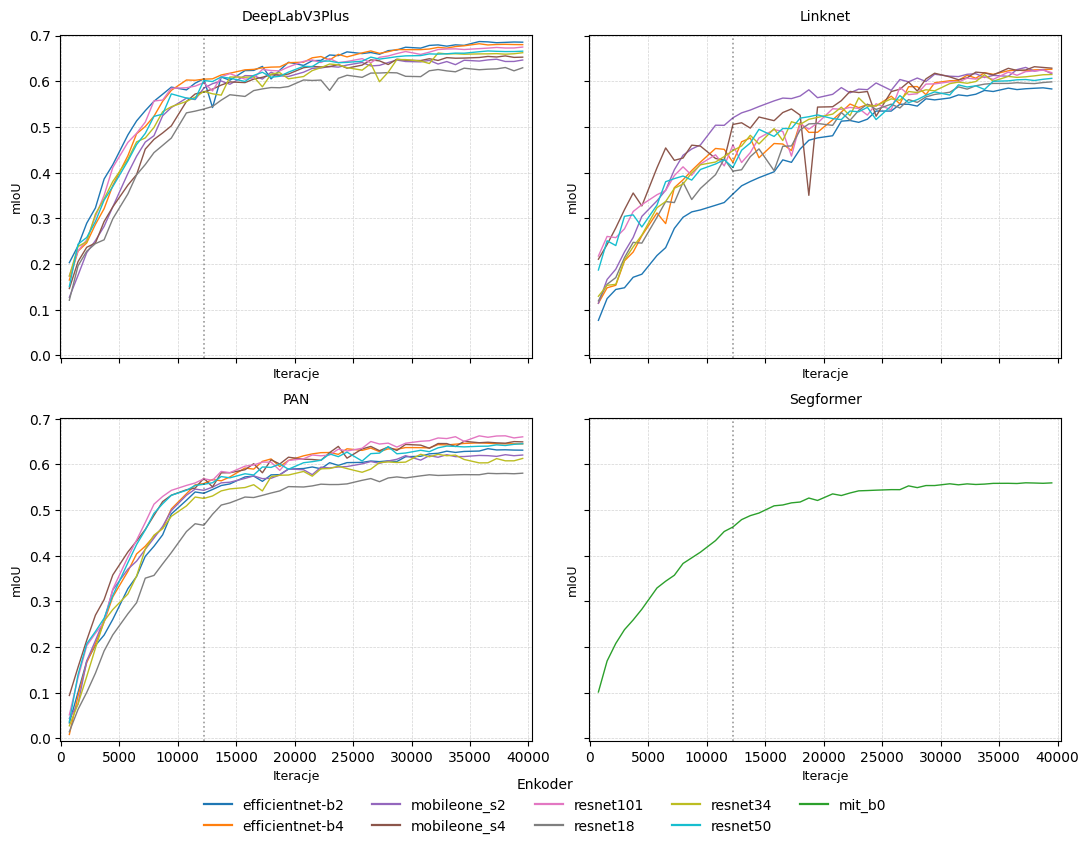

In [11]:
# ====== Wczytywanie danych 1:1 (jak w Twoim drugim przykładzie) ======
x_vals = []
y_vals = []
labels = []
architectures = []

# Dodatkowe struktury na przebiegi mIoU po krokach (nic nie zmieniam
# w samym "sposobie" wczytywania – tylko wykorzystuję te same obiekty)
# series[arch][encoder] = (steps ndarray, miou ndarray)
series = {}

# NOWE: lista kroków, w których LR miał maksimum dla poszczególnych biegów
lr_peak_steps = []

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        if metadata is None:
            continue
        
        if 'val_miou_dataset' not in metrics.columns:
            continue
        miou = metrics['val_miou_dataset'].tail(5).mean()
        
        fps = metadata.get('benchmark', {}).get('fps', None)
        if fps is None:
            continue
        
        name = metadata.get('encoder', 'unknown')
        arch = metadata.get('name', 'os.path.basename(arch_dir)')
        
        x_vals.append(fps)
        y_vals.append(miou)
        labels.append(name)
        architectures.append(arch)

        # ---- TU: wyciągamy pełny przebieg mIoU vs kroki dla (arch, encoder) ----
        # Szukamy kolumny z "krokami" – kolejność priorytetów:
        step_col = None
        for cand in ['global_step', 'step', 'iteration', 'iter', 'epoch']:
            if cand in metrics.columns:
                step_col = cand
                break
        # Jeśli brak kolumny kroku – użyj indeksu jako kroków
        if step_col is not None:
            steps_arr = np.asarray(metrics[step_col].values)
        else:
            steps_arr = np.arange(len(metrics), dtype=np.int64)

        miou_arr = np.asarray(metrics['val_miou_dataset'].values, dtype=float)

        # Zapisz najdłuższy dostępny przebieg dla pary (arch, encoder)
        if arch not in series:
            series[arch] = {}
        if (name not in series[arch]) or (len(steps_arr) > len(series[arch][name][0])):
            series[arch][name] = (steps_arr, miou_arr)

        # ====== NOWE: wykrycie maksimum LR i zapamiętanie odpowiadającego kroku ======
        lr_col = None
        for cand in ['lr', 'learning_rate', 'train/lr', 'optimizer_lr', 'lrate']:
            if cand in metrics.columns:
                lr_col = cand
                break
        # fallback – szukaj pierwszej kolumny zawierającej 'lr'
        if lr_col is None:
            for c in metrics.columns:
                if 'lr' in str(c).lower():
                    lr_col = c
                    break

        if lr_col is not None and len(metrics[lr_col]) > 0:
            lr_vals = np.asarray(metrics[lr_col].values, dtype=float)
            try:
                peak_idx = int(np.nanargmax(lr_vals))
                # zabezpieczenie na wypadek różnych długości kolumn:
                if 0 <= peak_idx < len(steps_arr):
                    lr_peak_steps.append(steps_arr[peak_idx])
            except ValueError:
                # np.nanargmax może rzucić, gdy same NaN – wtedy pomijamy
                pass

# Unikalne architektury i enkodery (na bazie identycznego wczytywania jak wyżej)
unique_archs = sorted(set(architectures))
unique_encs  = sorted(set(labels))

cmap     = plt.get_cmap('tab10')
PALETTE  = [cmap(i) for i in range(10)]
RESERVED = {'mit_b1': 3}   # 3 w tab10 = czerwony

# przypisz kolory zarezerwowane tylko jeśli dany enkoder faktycznie jest w danych
color_map_enc = {name: PALETTE[idx] for name, idx in RESERVED.items() if name in unique_encs}

# wolne indeksy palety poza zarezerwowanymi
avail_idx = [i for i in range(len(PALETTE)) if i not in set(RESERVED.values())]

# deterministyczny przydział kolorów dla pozostałych enkoderów
j = 0
for enc in unique_encs:
    if enc in RESERVED:
        continue
    color_map_enc[enc] = PALETTE[avail_idx[j % len(avail_idx)]]
    j += 1

# ====== Rysowanie: 4 panele (2x2), wspólna skala, linie = enkodery ======
fig, axes = plt.subplots(2, 2, figsize=(11, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Jeśli architektur < 4, wyświetlamy ile jest; jeśli > 4, bierzemy pierwsze 4
archs_to_plot = unique_archs[:4]
# Globalne zakresy do "tej samej skali"
all_x_min, all_x_max = np.inf, -np.inf
all_y_min, all_y_max = np.inf, -np.inf

# Najpierw policzmy globalne min/max – po wszystkich przebiegach, tylko dla wybranych 4 arch
for arch in archs_to_plot:
    if arch not in series:
        continue
    for enc, (xs, ys) in series[arch].items():
        if len(xs) == 0 or len(ys) == 0:
            continue
        all_x_min = min(all_x_min, np.nanmin(xs))
        all_x_max = max(all_x_max, np.nanmax(xs))
        all_y_min = min(all_y_min, np.nanmin(ys))
        all_y_max = max(all_y_max, np.nanmax(ys))

# Bezpieczne domyślne, jeśli brak danych
if not np.isfinite(all_x_min):
    all_x_min, all_x_max = 0, 1
if not np.isfinite(all_y_min):
    all_y_min, all_y_max = 0.0, 1.0

# Drobny margines osi
dx = (all_x_max - all_x_min) * 0.02 if all_x_max > all_x_min else 1.0
dy = (all_y_max - all_y_min) * 0.02 if all_y_max > all_y_min else 0.05

for ax, arch in zip(axes, archs_to_plot):
    # Każdy panel – inna architektura
    if arch in series:
        for enc, (xs, ys) in sorted(series[arch].items()):
            if len(xs) == 0 or len(ys) == 0:
                continue
            ax.plot(xs, ys, label=enc, linewidth=1.0,
                    color=color_map_enc.get(enc, None))
    # Siatka i opisy
    ax.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')
    ax.set_xlabel('Iteracje', fontsize=9)
    ax.set_ylabel('mIoU', fontsize=9)
    ax.text(0.5, 1.08, arch, transform=ax.transAxes,
            ha='center', va='top', fontsize=10)

    # Wymuszenie tej samej skali na wszystkich panelach
    ax.set_xlim(all_x_min - dx, all_x_max + dx)
    ax.set_ylim(all_y_min - dy, all_y_max + dy)

# Jeśli nie wszystkie 4 osie są użyte, wyłącz puste
for k in range(len(archs_to_plot), 4):
    axes[k].axis('off')

# Wspólna legenda (enkodery = kolory)
# Zbierz uchwyty/etykiety z pierwszej niepustej osi
handles, legend_labels = [], []
for arch in archs_to_plot:
    if arch in series and len(series[arch]) > 0:
        for enc in unique_encs:
            if enc in series[arch] and enc not in legend_labels:
                handles.append(plt.Line2D([0],[0], linewidth=1.6,
                              color=color_map_enc.get(enc, None)))
                legend_labels.append(enc)

if handles:
    fig.legend(handles, legend_labels, title='Enkoder', loc='lower center',
               ncol=min(5, max(1, len(legend_labels))), frameon=False, bbox_to_anchor=(0.5, -0.06))

# ====== NOWE: delikatna linia referencyjna w "miejscu" maksymalnego LR ======
# Wybierz najczęstszy (modalny) krok występowania maksimum LR; jeśli remis – weź medianę
lr_line_x = None
if len(lr_peak_steps) > 0:
    vals, counts = np.unique(lr_peak_steps, return_counts=True)
    lr_line_x = vals[np.argmax(counts)]
    # (opcjonalnie) jeśli chcesz medianę kroków maksimum zamiast trybu:
    # lr_line_x = int(np.median(lr_peak_steps))

if lr_line_x is not None:
    for ax in axes:
        if ax.axes:  # rysuj również na pustych wyłączonych osiach nie ma potrzeby, ale to nie szkodzi
            ax.axvline(x=lr_line_x, linestyle=':', linewidth=1.2, color='k', alpha=0.4)
    # (opcjonalnie) podpis:
    # axes[0].annotate('max LR', (lr_line_x, all_y_max), xytext=(5, -10),
    #                  textcoords='offset points', ha='left', va='top', fontsize=8, color='k')

plt.tight_layout()
plt.margins(0.02, 0.02)
plt.savefig(f'{chapter_dir}\{approach_name}_learning1.png', dpi=150, bbox_inches='tight')


<string>:180: SyntaxWarning: invalid escape sequence '\{'
<>:180: SyntaxWarning: invalid escape sequence '\{'
<string>:180: SyntaxWarning: invalid escape sequence '\{'
<>:180: SyntaxWarning: invalid escape sequence '\{'
C:\Users\fhcar\AppData\Local\Temp\ipykernel_28208\1273583620.py:180: SyntaxWarning: invalid escape sequence '\{'
  plt.savefig(f'{chapter_dir}\{approach_name}_learning2.png', dpi=150, bbox_inches='tight')


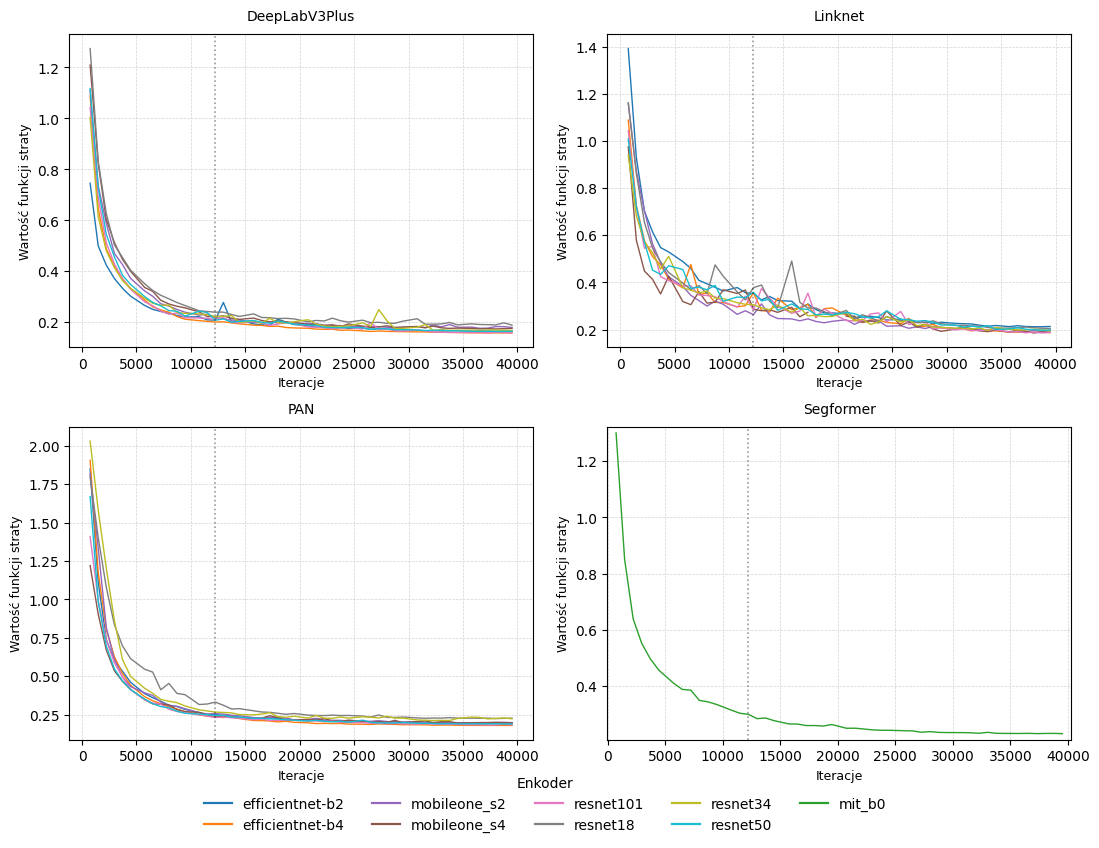

In [12]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# ====== Wczytywanie danych 1:1 (jak w Twoim drugim przykładzie) ======
x_vals = []
y_vals = []
labels = []
architectures = []

# Dodatkowe struktury na przebiegi STRATY po krokach (sposób wczytywania bez zmian)
# series[arch][encoder] = (steps ndarray, loss ndarray)
series = {}

# Lista kroków, w których LR miał maksimum dla poszczególnych biegów (bez zmian)
lr_peak_steps = []

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        if metadata is None:
            continue

        # --- Wybór kolumny ze stratą (loss) ---
        loss_col = None
        for cand in ['val_loss', 'loss', 'train/loss', 'training_loss', 'total_loss', 'val/total_loss']:
            if cand in metrics.columns:
                loss_col = cand
                break
        if loss_col is None:
            # fallback: pierwsza kolumna zawierająca 'loss'
            for c in metrics.columns:
                if 'loss' in str(c).lower():
                    loss_col = c
                    break
        if loss_col is None:
            continue  # jeśli nie ma loss w metrykach, pomijamy

        # Uśredniona końcówka (5 ostatnich) – nie jest rysowana, ale zachowujemy 1:1 strukturę list
        loss_tail_mean = metrics[loss_col].tail(5).mean()

        fps = metadata.get('benchmark', {}).get('fps', None)
        if fps is None:
            continue
        
        name = metadata.get('encoder', 'unknown')
        arch = metadata.get('name', 'os.path.basename(arch_dir)')
        
        x_vals.append(fps)
        y_vals.append(loss_tail_mean)  # teraz przechowujemy uśrednioną stratę
        labels.append(name)
        architectures.append(arch)

        # ---- Pełny przebieg: KROKI ----
        step_col = None
        for cand in ['global_step', 'step', 'iteration', 'iter', 'epoch']:
            if cand in metrics.columns:
                step_col = cand
                break
        if step_col is not None:
            steps_arr = np.asarray(metrics[step_col].values)
        else:
            steps_arr = np.arange(len(metrics), dtype=np.int64)

        # ---- Pełny przebieg: STRATA (loss) ----
        loss_arr = np.asarray(metrics[loss_col].values, dtype=float)

        # Zapisz najdłuższy dostępny przebieg dla pary (arch, encoder)
        if arch not in series:
            series[arch] = {}
        if (name not in series[arch]) or (len(steps_arr) > len(series[arch][name][0])):
            series[arch][name] = (steps_arr, loss_arr)

        # ====== Detekcja maksimum LR (bez zmian) ======
        lr_col = None
        for cand in ['lr', 'learning_rate', 'train/lr', 'optimizer_lr', 'lrate']:
            if cand in metrics.columns:
                lr_col = cand
                break
        if lr_col is None:
            for c in metrics.columns:
                if 'lr' in str(c).lower():
                    lr_col = c
                    break

        if lr_col is not None and len(metrics[lr_col]) > 0:
            lr_vals = np.asarray(metrics[lr_col].values, dtype=float)
            try:
                peak_idx = int(np.nanargmax(lr_vals))
                if 0 <= peak_idx < len(steps_arr):
                    lr_peak_steps.append(steps_arr[peak_idx])
            except ValueError:
                pass

# Unikalne architektury i enkodery (jak wcześniej)
unique_archs = sorted(set(architectures))
unique_encs  = sorted(set(labels))

cmap     = plt.get_cmap('tab10')
PALETTE  = [cmap(i) for i in range(10)]
RESERVED = {'mit_b1': 3}   # 3 w tab10 = czerwony

# przypisz kolory zarezerwowane tylko jeśli dany enkoder faktycznie jest w danych
color_map_enc = {name: PALETTE[idx] for name, idx in RESERVED.items() if name in unique_encs}

# wolne indeksy palety poza zarezerwowanymi
avail_idx = [i for i in range(len(PALETTE)) if i not in set(RESERVED.values())]

# deterministyczny przydział kolorów dla pozostałych enkoderów
j = 0
for enc in unique_encs:
    if enc in RESERVED:
        continue
    color_map_enc[enc] = PALETTE[avail_idx[j % len(avail_idx)]]
    j += 1

# ====== Rysowanie: 4 panele (2x2), osobne skale, linie = enkodery ======
# Uwaga: usuwamy sharex/sharey, każda oś ma swoją skalę
fig, axes = plt.subplots(2, 2, figsize=(11, 8))
axes = axes.flatten()

# Jeśli architektur < 4, wyświetlamy ile jest; jeśli > 4, bierzemy pierwsze 4
archs_to_plot = unique_archs[:4]

for ax, arch in zip(axes, archs_to_plot):
    # Każdy panel – inna architektura
    if arch in series:
        for enc, (xs, ys) in sorted(series[arch].items()):
            if len(xs) == 0 or len(ys) == 0:
                continue
            ax.plot(xs, ys, label=enc, linewidth=1.0,
                    color=color_map_enc.get(enc, None))

    # Siatka i opisy
    ax.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')
    ax.set_xlabel('Iteracje', fontsize=9)
    ax.set_ylabel('Wartość funkcji straty', fontsize=9)
    ax.text(0.5, 1.08, arch, transform=ax.transAxes,
            ha='center', va='top', fontsize=10)

# Jeśli nie wszystkie 4 osie są użyte, wyłącz puste
for k in range(len(archs_to_plot), 4):
    axes[k].axis('off')

# Wspólna legenda (enkodery = kolory) – bez zmian
handles, legend_labels = [], []
for arch in archs_to_plot:
    if arch in series and len(series[arch]) > 0:
        for enc in unique_encs:
            if enc in series[arch] and enc not in legend_labels:
                handles.append(plt.Line2D([0],[0], linewidth=1.6,
                              color=color_map_enc.get(enc, None)))
                legend_labels.append(enc)

if handles:
    fig.legend(handles, legend_labels, title='Enkoder', loc='lower center',
               ncol=min(5, max(1, len(legend_labels))), frameon=False, bbox_to_anchor=(0.5, -0.06))

# ====== Linia referencyjna dla "miejsca" maksymalnego LR (BEZ ZMIAN) ======
lr_line_x = None
if len(lr_peak_steps) > 0:
    vals, counts = np.unique(lr_peak_steps, return_counts=True)
    lr_line_x = vals[np.argmax(counts)]
    # (opcjonalnie): lr_line_x = int(np.median(lr_peak_steps))

if lr_line_x is not None:
    for ax in axes:
        if ax.axes:
            ax.axvline(x=lr_line_x, linestyle=':', linewidth=1.2, color='k', alpha=0.4)
    # (opcjonalnie) podpis:
    # axes[0].annotate('max LR', (lr_line_x, ax.get_ylim()[1]), xytext=(5, -10),
    #                  textcoords='offset points', ha='left', va='top', fontsize=8, color='k')

plt.tight_layout()
plt.margins(0.02, 0.02)
plt.savefig(f'{chapter_dir}\{approach_name}_learning2.png', dpi=150, bbox_inches='tight')


<string>:99: SyntaxWarning: invalid escape sequence '\{'
<>:99: SyntaxWarning: invalid escape sequence '\{'
<string>:99: SyntaxWarning: invalid escape sequence '\{'
<>:99: SyntaxWarning: invalid escape sequence '\{'
C:\Users\fhcar\AppData\Local\Temp\ipykernel_28208\2782188976.py:99: SyntaxWarning: invalid escape sequence '\{'
  plt.savefig(f'{chapter_dir}\{approach_name}_results_pre1.png', dpi=150, bbox_inches='tight')
C:\Users\fhcar\AppData\Local\Temp\ipykernel_28208\2782188976.py:74: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(xs, ys, c=cols, s=50, marker='x',


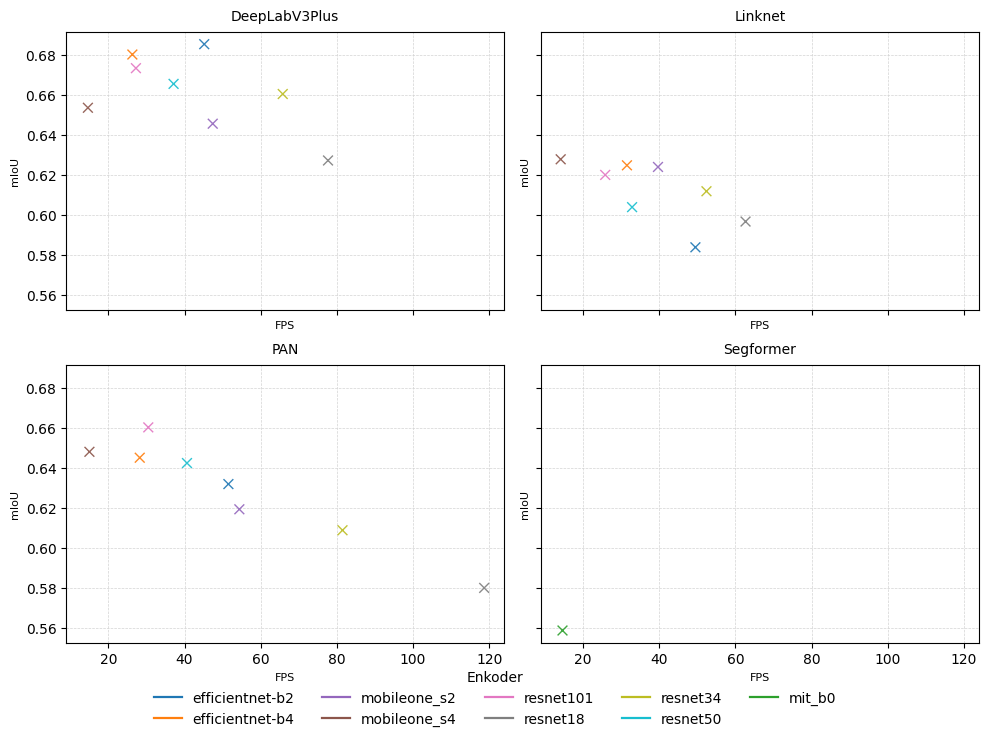

In [13]:
import matplotlib.pyplot as plt

# ====== Wczytywanie danych 1:1 (bez zmian) ======
x_vals = []
y_vals = []
labels = []
architectures = []

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        if metadata is None:
            continue
        if 'val_miou_dataset' not in metrics.columns:
            continue

        miou = metrics['val_miou_dataset'].tail(5).mean()
        fps  = metadata.get('benchmark', {}).get('fps', None)
        if fps is None:
            continue

        name = metadata.get('encoder', 'unknown')
        arch = metadata.get('name', 'os.path.basename(arch_dir)')

        x_vals.append(fps)
        y_vals.append(miou)
        labels.append(name)          # <-- enkoder
        architectures.append(arch)   # <-- architektura

# ====== Zmiana: kolory per ENKODER ======
unique_archs = sorted(set(architectures))
unique_encs  = sorted(set(labels))

cmap     = plt.get_cmap('tab10')
PALETTE  = [cmap(i) for i in range(10)]
RESERVED = {'mit_b1': 3}   # 3 w tab10 = czerwony

# przypisz kolory zarezerwowane tylko jeśli dany enkoder faktycznie jest w danych
color_map_enc = {name: PALETTE[idx] for name, idx in RESERVED.items() if name in unique_encs}

# wolne indeksy palety poza zarezerwowanymi
avail_idx = [i for i in range(len(PALETTE)) if i not in set(RESERVED.values())]

# deterministyczny przydział kolorów dla pozostałych enkoderów
j = 0
for enc in unique_encs:
    if enc in RESERVED:
        continue
    color_map_enc[enc] = PALETTE[avail_idx[j % len(avail_idx)]]
    j += 1

# Minimalna „series” do legendy (klucze encoderów wystarczą do `enc in series[arch]`)
series = {}
for a, enc in zip(architectures, labels):
    series.setdefault(a, {})
    series[a][enc] = True

archs_to_plot = unique_archs[:4]

# ====== Rysowanie: 4 panele, kolory per enkoder ======
fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, arch in zip(axes, archs_to_plot):
    idxs = [i for i, a in enumerate(architectures) if a == arch]
    xs   = [x_vals[i] for i in idxs]
    ys   = [y_vals[i] for i in idxs]
    labs = [labels[i]    for i in idxs]  # enkodery dla tych punktów
    cols = [color_map_enc[l] for l in labs]

    ax.scatter(xs, ys, c=cols, s=50, marker='x',
               edgecolor='k', linewidth=1, alpha=0.9, zorder=3)

    ax.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')
    ax.set_xlabel('FPS', fontsize=8)
    ax.set_ylabel('mIoU', fontsize=8)
    ax.text(0.5, 1.08, arch, transform=ax.transAxes,
            ha='center', va='top', fontsize=10)

# ====== Twoja legenda 1:1 ======
handles, legend_labels = [], []
for arch in archs_to_plot:
    if arch in series and len(series[arch]) > 0:
        for enc in unique_encs:
            if enc in series[arch] and enc not in legend_labels:
                handles.append(plt.Line2D([0],[0], linewidth=1.6,
                              color=color_map_enc.get(enc, None)))
                legend_labels.append(enc)

if handles:
    fig.legend(handles, legend_labels, title='Enkoder', loc='lower center',
               ncol=min(5, max(1, len(legend_labels))), frameon=False, bbox_to_anchor=(0.5, -0.06))

plt.tight_layout()
plt.margins(0.15, 0.1)
plt.savefig(f'{chapter_dir}\{approach_name}_results_pre1.png', dpi=150, bbox_inches='tight')


<string>:182: SyntaxWarning: invalid escape sequence '\{'
<>:182: SyntaxWarning: invalid escape sequence '\{'
<string>:182: SyntaxWarning: invalid escape sequence '\{'
<>:182: SyntaxWarning: invalid escape sequence '\{'
C:\Users\fhcar\AppData\Local\Temp\ipykernel_28208\840830964.py:182: SyntaxWarning: invalid escape sequence '\{'
  plt.savefig(f'{chapter_dir}\{approach_name}_results1.png', dpi=150, bbox_inches='tight')
C:\Users\fhcar\AppData\Local\Temp\ipykernel_28208\840830964.py:109: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_rest = ax.scatter(rest_x, rest_y, c=[col], s=50, marker='x',
C:\Users\fhcar\AppData\Local\Temp\ipykernel_28208\840830964.py:111: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the futur

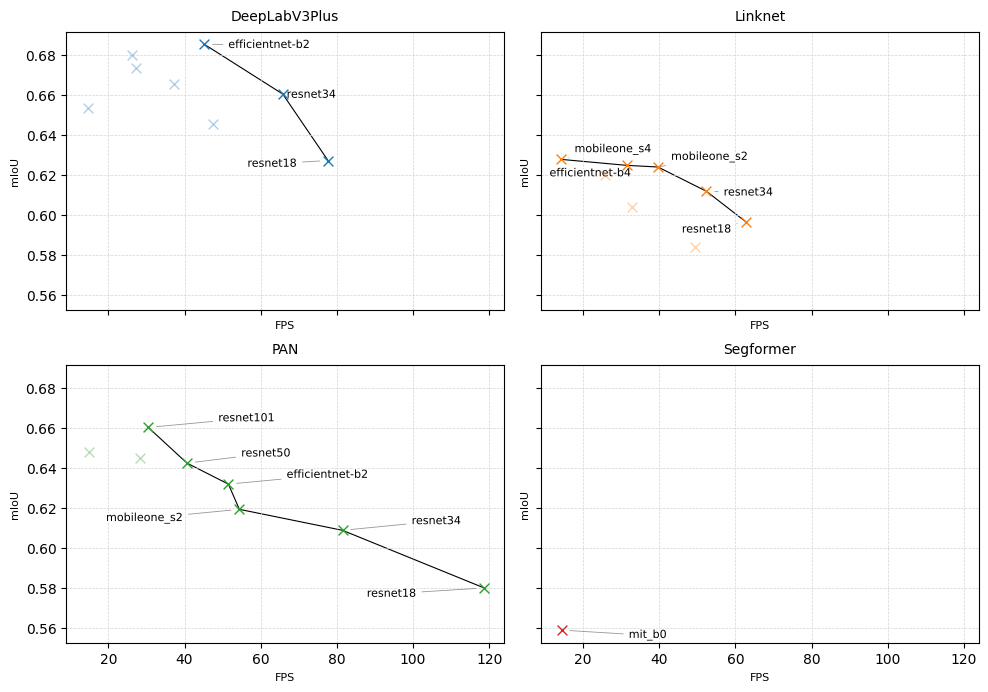

In [14]:
from adjustText import adjust_text
import matplotlib.patheffects as pe
import math

# --- POMOCNICZE --------------------------------------------------------------
def _y_on_polyline(xp, segments):
    """Interpolowany y na obwiedni (lista odcinków: x1,y1,x2,y2)."""
    y_cand, best_dx = None, float('inf')
    for x1, y1, x2, y2 in segments:
        if abs(x2 - x1) > 1e-12:
            lo, hi = (x1, x2) if x1 <= x2 else (x2, x1)
            if lo - 1e-12 <= xp <= hi + 1e-12:
                t = (xp - x1) / (x2 - x1)
                return y1 + t * (y2 - y1)
        dx = min(abs(xp - x1), abs(xp - x2))
        y_end = y1 if abs(xp - x1) < abs(xp - x2) else y2
        if dx < best_dx:
            best_dx, y_cand = dx, y_end
    return y_cand

def _min_vdist_to_points(xl, yl, pts, x_window):
    """Minimalna pionowa odległość od punktów w oknie |x - xl| <= x_window."""
    best = float('inf')
    for xp, yp in pts:
        if abs(xp - xl) <= x_window:
            best = min(best, abs(yl - yp))
    return best

def _choose_side(ax, x, y, dx, pf_segments, all_pts):
    """
    Zwraca +1 (prawo) albo -1 (lewo) – tę stronę, gdzie etykieta będzie miała
    większy „bufor” względem linii frontu i punktów oraz nie wyjedzie poza oś.
    """
    xmin, xmax = ax.get_xlim()
    dy_axis = (ax.get_ylim()[1] - ax.get_ylim()[0])
    pad_x = 0.01 * (xmax - xmin)
    x_win = 0.6 * dx  # okno do sprawdzania kolizji z punktami

    best_side, best_score = +1, -1.0
    for side in (+1, -1):
        xl = x + side * dx
        yl = y
        # poza osią? duża kara
        if xl < xmin + pad_x or xl > xmax - pad_x:
            score = -1e9
        else:
            y_line = _y_on_polyline(xl, pf_segments) if pf_segments else None
            gap_line = abs(yl - y_line) if y_line is not None else dy_axis  # jeśli brak segmentu, traktuj jak OK
            gap_pts  = _min_vdist_to_points(xl, yl, all_pts, x_win)
            score = min(gap_line, gap_pts)  # konserwatywnie
        if score > best_score:
            best_score, best_side = score, side
    return best_side
# -----------------------------------------------------------------------------

x_vals = []
y_vals = []
labels = []
architectures = []

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        if metadata is None:
            continue
        
        if 'val_miou_dataset' not in metrics.columns:
            continue
        miou = metrics['val_miou_dataset'].tail(5).mean()
        
        fps = metadata.get('benchmark', {}).get('fps', None)
        if fps is None:
            continue
        
        name = metadata.get('encoder', 'unknown')
        arch = metadata.get('name', 'os.path.basename(arch_dir)')
        
        x_vals.append(fps)
        y_vals.append(miou)
        labels.append(name)
        architectures.append(arch)


fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, arch in zip(axes, unique_archs):
    idxs = [i for i, a in enumerate(architectures) if a == arch]
    xs   = [x_vals[i] for i in idxs]
    ys   = [y_vals[i] for i in idxs]
    labs = [labels[i] for i in idxs]
    col  = color_map[arch]

    if xs and ys:
        pf_idx  = pareto_front_indices(xs, ys)
        pf_set  = set(pf_idx)
        rest_ix = [i for i in range(len(xs)) if i not in pf_set]

        pf_x, pf_y, pf_lab = [xs[i] for i in pf_idx], [ys[i] for i in pf_idx], [labs[i] for i in pf_idx]
        rest_x, rest_y     = [xs[i] for i in rest_ix], [ys[i] for i in rest_ix]

        # linia frontu pod punktami
        ax.plot(pf_x, pf_y, color='k', linewidth=0.8, zorder=1)

        # punkty
        sc_rest = ax.scatter(rest_x, rest_y, c=[col], s=50, marker='x',
                             edgecolor='k', linewidth=1, alpha=0.35, zorder=2)
        sc_pf   = ax.scatter(pf_x, pf_y,   c=[col], s=50, marker='x',
                             edgecolor='k', linewidth=1, alpha=1.0,  zorder=3)

        # odstępy w jednostkach danych
        xmin, xmax = ax.get_xlim();  ymin, ymax = ax.get_ylim()
        dx = 0.1 * (xmax - xmin)   # poziomy offset etykiety (dostosuj 0.04–0.10 wg gustu)
        dy0 = 0.015 * (ymax - ymin) # minimalny pionowy offset startowy

        # segmenty frontu dla obliczeń
        pf_segments = list(zip(pf_x[:-1], pf_y[:-1], pf_x[1:], pf_y[1:]))
        all_pts = list(zip(pf_x + rest_x, pf_y + rest_y))

        # etykiety tylko dla frontu – AUTOMATYCZNY WYBÓR STRONY (lewo/prawo)
        texts = []
        for x, y, lbl in zip(pf_x, pf_y, pf_lab):
            side = _choose_side(ax, x, y, dx, pf_segments, all_pts)   # +1=right, -1=left
            xl = x + side * dx
            # start minimalnie nad/pod linią (jeśli xl leży na segmencie)
            y_line = _y_on_polyline(xl, pf_segments) if pf_segments else None
            yl = y if y_line is None else (y + dy0 if y >= y_line else y - dy0)

            t = ax.annotate(
                lbl,
                xy=(x, y), xytext=(xl, yl), textcoords='data',
                ha='left' if side > 0 else 'right', va='center',
                fontsize=8, clip_on=True, zorder=2.1,
                arrowprops=dict(arrowstyle='-', lw=0.6, color='0.45', alpha=0.75,
                                shrinkA=2, shrinkB=6)
            )
            t.set_path_effects([pe.withStroke(linewidth=2, foreground='white')])
            t.set_clip_path(ax.patch)
            texts.append(t)

        # delikatne rozplątanie tylko w pionie (unikaj kolizji z punktami)
        adjust_text(
            texts,
            add_objects=[sc_rest, sc_pf],
            ax=ax,
            only_move={'text': 'y', 'points': 'y'},   # x zostaje po lewej/prawej
            autoalign=False,
            expand_points=(1.15, 1.25),
            expand_text=(1.02, 1.05),
            force_points=0.06,
            force_text=0.04,
            lim=120,
            precision=0.01
        )

        # punkty zawsze nad etykietami i łącznikami
        sc_rest.set_zorder(5)
        sc_pf.set_zorder(6)

        # bezpieczeństwo: trzymaj napisy w panelu
        pad_x = 0.01 * (xmax - xmin); pad_y = 0.01 * (ymax - ymin)
        for t in texts:
            xt, yt = t.get_position()
            xt = min(max(xt, xmin + pad_x), xmax - pad_x)
            yt = min(max(yt, ymin + pad_y), ymax - pad_y)
            t.set_position((xt, yt))

    else:
        ax.scatter([], [], c=[col], s=50, edgecolor='k', linewidth=0.5)

    ax.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')
    ax.set_xlabel('FPS', fontsize=8)
    ax.set_ylabel('mIoU', fontsize=8)
    ax.text(0.5, 1.08, arch, transform=ax.transAxes, ha='center', va='top', fontsize=10)

plt.tight_layout()
plt.margins(0.15, 0.1)

plt.savefig(f'{chapter_dir}\{approach_name}_results1.png', dpi=150, bbox_inches='tight')


<string>:130: SyntaxWarning: invalid escape sequence '\{'
<>:130: SyntaxWarning: invalid escape sequence '\{'
<string>:130: SyntaxWarning: invalid escape sequence '\{'
<>:130: SyntaxWarning: invalid escape sequence '\{'
C:\Users\fhcar\AppData\Local\Temp\ipykernel_28208\2662077833.py:130: SyntaxWarning: invalid escape sequence '\{'
  plt.savefig(f'{chapter_dir}\{approach_name}_results2.png', dpi=150, bbox_inches='tight')
C:\Users\fhcar\AppData\Local\Temp\ipykernel_28208\2662077833.py:63: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_rest = ax.scatter(rest_x, rest_y, c=rest_col, s=50, marker='x',
C:\Users\fhcar\AppData\Local\Temp\ipykernel_28208\2662077833.py:67: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the f

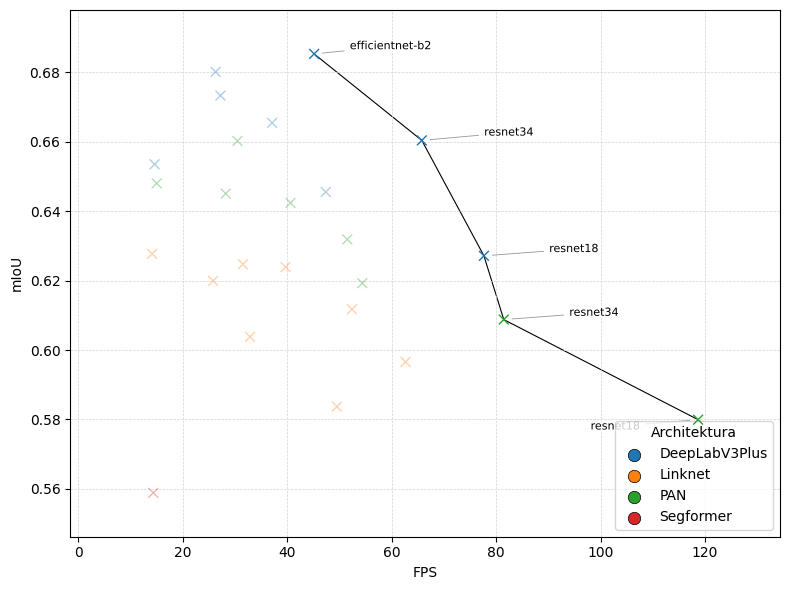

In [15]:
from adjustText import adjust_text
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# ====== Wczytywanie danych 1:1 (jak w KOD1) ======
x_vals = []
y_vals = []
labels = []
architectures = []

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        if metadata is None:
            continue
        
        if 'val_miou_dataset' not in metrics.columns:
            continue
        miou = metrics['val_miou_dataset'].tail(5).mean()
        
        fps = metadata.get('benchmark', {}).get('fps', None)
        if fps is None:
            continue
        
        name = metadata.get('encoder', 'unknown')              # etykieta (np. enkoder)
        arch = metadata.get('name', 'os.path.basename(arch_dir)')  # architektura
        
        x_vals.append(fps)
        y_vals.append(miou)
        labels.append(name)
        architectures.append(arch)

# ====== Kolory per architektura (jak w KOD1) ======
unique_archs = sorted(set(architectures))
cmap         = plt.get_cmap('tab10')  # paleta 10 kolorów
color_map    = {arch: cmap(i) for i, arch in enumerate(unique_archs)}
colors       = [color_map[arch] for arch in architectures]

# ====== Globalny front Pareto dla WSZYSTKICH punktów ======
pf_idx  = pareto_front_indices(x_vals, y_vals)   # <- zakładamy, że funkcja istnieje
pf_set  = set(pf_idx)
rest_ix = [i for i in range(len(x_vals)) if i not in pf_set]

pf_x   = [x_vals[i] for i in pf_idx]
pf_y   = [y_vals[i] for i in pf_idx]
pf_lab = [labels[i]  for i in pf_idx]
pf_col = [colors[i]  for i in pf_idx]

rest_x  = [x_vals[i] for i in rest_ix]
rest_y  = [y_vals[i] for i in rest_ix]
rest_col= [colors[i] for i in rest_ix]

# ====== Rysowanie ======
fig, ax = plt.subplots(figsize=(8, 6))

# 1) Linia frontu pod punktami (jak w KOD2)
ax.plot(pf_x, pf_y, color='k', linewidth=0.8, zorder=1)

# 2) Punkty spoza frontu – półprzezroczyste, bez etykiet
sc_rest = ax.scatter(rest_x, rest_y, c=rest_col, s=50, marker='x',
                     edgecolor='k', linewidth=1, alpha=0.35, zorder=2)

# 3) Punkty na froncie – pełna krycia
sc_pf = ax.scatter(pf_x, pf_y, c=pf_col, s=50, marker='x',
                   edgecolor='k', linewidth=1, alpha=1.0, zorder=3)

# 4) Etykiety TYLKO dla punktów z frontu (styl jak w KOD2)
#    segmenty frontu do obliczeń offsetów
pf_segments = list(zip(pf_x[:-1], pf_y[:-1], pf_x[1:], pf_y[1:]))
all_pts     = list(zip(pf_x + rest_x, pf_y + rest_y))

# odsunięcia w jednostkach danych
xmin, xmax = ax.get_xlim();  ymin, ymax = ax.get_ylim()
dx  = 0.30 * (xmax - xmin)
dy0 = 0.05 * (ymax - ymin)

texts = []
for x, y, lbl in zip(pf_x, pf_y, pf_lab):
    side = _choose_side(ax, x, y, dx, pf_segments, all_pts)  # +1=right, -1=left
    xl = x + side * dx

    y_line = _y_on_polyline(xl, pf_segments) if pf_segments else None
    yl = y if y_line is None else (y + dy0 if y >= y_line else y - dy0)

    t = ax.annotate(
        lbl,
        xy=(x, y), xytext=(xl, yl), textcoords='data',
        ha='left' if side > 0 else 'right', va='center',
        fontsize=8, clip_on=True, zorder=3.5,
        arrowprops=dict(arrowstyle='-', lw=0.6, color='0.45', alpha=0.75,
                        shrinkA=2, shrinkB=6)
    )
    t.set_path_effects([pe.withStroke(linewidth=2, foreground='white')])
    t.set_clip_path(ax.patch)
    texts.append(t)

# delikatne rozplątanie etykiet frontu (jak w KOD2; ruch w pionie)
adjust_text(
    texts,
    add_objects=[sc_rest, sc_pf],
    ax=ax,
    only_move={'text': 'y', 'points': 'y'},
    autoalign=False,
    expand_points=(1.15, 1.25),
    expand_text=(1.02, 1.05),
    force_points=0.06,
    force_text=0.04,
    lim=120,
    precision=0.01
)

# warstwa: punkty > etykiety > linia
sc_rest.set_zorder(5)
sc_pf.set_zorder(6)

# ====== Legenda per architektura (jak w KOD1) ======
for arch, col in color_map.items():
    ax.scatter([], [], c=[col], s=80, edgecolor='k', linewidth=0.5, label=arch)
ax.legend(title='Architektura', loc='lower right')

# ====== Oprawa wykresu ======
ax.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')
ax.set_xlabel('FPS')
ax.set_ylabel('mIoU')
plt.tight_layout()
plt.margins(0.15, 0.1)
plt.savefig(f'{chapter_dir}\{approach_name}_results2.png', dpi=150, bbox_inches='tight')
